<a href="https://colab.research.google.com/github/vaishnavisharma6/Tveito-Winther-codes/blob/main/Linear_System_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algorithm to solve a linear system of the form Av = b

## Part 1
Given a linear system:-
$$
Av = b
$$
where A is a (n*n) matrix of the form
$$
A = \begin{bmatrix}
\alpha_{1} & \gamma_{1} & 0 & \dots & 0\\
\beta_{2} & \alpha_{2} & \gamma_{2} & \ddots & \vdots\\
0 & \ddots & \ddots & \ddots & 0\\
\vdots & \ddots & \beta_{n-1} & \alpha_{n-1} & \gamma_{n-1}\\
0 & \dots & 0 & \beta_{n} & \alpha_{n} \end{bmatrix}
$$

v is a (n*1) vector of the form:-
$$
v = \begin{bmatrix}
v_{1}\\
v_{2}\\
\vdots\\
v_{n} \end{bmatrix}
$$

b is a (n*1) vector of the form:-
$$
b = \begin{bmatrix}
b_{1}\\
b_{2}\\
\vdots\\
b_{n} \end{bmatrix}
$$
We will write a function **solve()** that will take alpha,beta,gamma (where alpha,beta and gamma are main diagonal,sub-diagonal and super-diagonal respectively) and b as input and will give v as output.

The algorithm will be based on the method called Gaussian Elimination for tridiagonal linear systems.

Here is a brief overview of Gaussian elimination:-

The linear system described above can be equivalently written as:-
$$
\begin{eqnarray*}
\alpha_{1}v_{1} + \gamma_{1}v_{2} = b_{1},\\
\beta_{2}v_{1} + \alpha_{2}v_{2} + \gamma_{2}v_{3} = b_{2},\\
\hspace{3ex} \beta_{3}v_{2} + \alpha_{3}v{3} + \gamma_{3}v_{4} = b_{3},\\
\vdots \\
\beta_{n-1}v_{n-2} + \alpha_{n-1}v_{n-1} + \gamma_{n-1}v_{n} = b_{n-1},\\
\beta_{n}v_{n-1} + \alpha_{n}v_{n} = b_{n}
\end{eqnarray*}                 
$$                 
We will use first equation to eliminate the first variable($v_{1}$) from second equation. Then, new version of second equation will bes used to eliminate the second variable($v_{2}$) from third equation and so on.

If we subtract $m_{2}$ = $\beta_{2}$/$\alpha_{1}$ times the first equation from second equation, second equation becomes:-
$$
\delta_{2}v_{2} + \gamma_{2}v_{3} = c_{2}
$$
where
$$
\delta_{2} = \alpha_{2} - m_{2}\gamma_{1}
$$
and
$$
c_{2} = b_{2} - m_{2}b_{1}
$$

In general,
If $(j-1)_{th}$ equation has been transformed as:-
$$
\delta_{j-1}v_{j-1} + \gamma_{j-1}v_{j} = c_{j-1}
$$
And the original $(j)_{th}$ equation is:-
$$
\beta_{j}v_{j-1} + \alpha_{j}v_{j} + \gamma_{j}v_{j+1} = b_{j}
$$

Then if $m_{j}$ = $\beta_{j}/\delta_{j-1}$ times transformed $(j-1)_{th}$ equation is subtracted from original $j_{th}$ equation, we get:-
$$
\delta_{j}v_{j} + \gamma_{j}v_{j+1} = c_{j}
$$
where
$$
\delta_{j} = \alpha_{j} - m_{j}\gamma_{j-1},
$$
$$
c_{j} = b_{j} - m_{j}c_{j-1}.
$$

Hence the variables can be defined as:-
$$
\begin{eqnarray*}
\delta_{1} = \alpha_{1}, c_{1} = b_{1},\\
m_{j} = \beta_{j}/\delta_{j-1},\\
\delta_{j} = \alpha_{j} - m_{j}\gamma_{j-1}, \qquad 2 \le j \le k,\\
c_{j} = b_{j} - m_{j}c_{j-1}.
\end{eqnarray*}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags    
%config InlineBackend.figure_format = 'svg'

In [2]:
def solve(n,alpha,beta,gamma,b):
    A = diags([beta,alpha,gamma],[-1,0,1],shape = (n,n)).toarray()
    delta = np.zeros(n)
    c = np.zeros(n)
    m = np.zeros(n)
    delta[0] = alpha[0]
    c[0] = b[0]
    v = np.zeros(n)
    for k in range(1,n):
        m[k] = beta[k]/delta[k-1]
        delta[k] = alpha[k] - (m[k]* gamma[k-1])
        c[k] = b[k] - (m[k] * c[k-1])
    v[n-1] = c[n-1]/delta[n-1]
    for j in range(n-2,-1,-1):
        v[j] = (c[j]- (gamma[j]*v[j+1]))/delta[j]
    return(v)

In [3]:
n = 5
alpha = np.random.rand(n)
beta = np.random.rand(n)
gamma = np.random.rand(n)
b = np.random.rand(n)
v = solve(n,alpha,beta,gamma,b)
print('Solution vector v is:',v)

Solution vector v is: [ 4.31019953 -3.75838615  2.83049951  2.34895868 -0.75034051]


# Part 2
## For solving boundary value problems
We will now narrow down the matrix A to the coefficients matrix for second order finite difference scheme for the poisson's equation given by:-

$$
-u''(x) = f(x), \qquad x \in (0,1) 
$$
Subject to the conditions:-
$$
u(0) = u(1) = 0
$$

We will define a uniform grid of $n+1$ points from $x_{0} = 0$ to $x_{n+1} = 1$ with spacing
$$
h = \frac{1}{n+1}
$$
and
$$
x_j = j h, \qquad 0 \le j \le n+1
$$



Let the numerical solution 

$$
v_{j} \approx u(x_{j})
$$
Approximate $u''$ using second order central difference

\begin{eqnarray*}
U_0 &=& 0 \\
-\frac{U_{j-1} - 2U_{j} + U_{j+1}}{h^{2}} &=& f_j, \qquad 1 \le j \le n \\
U_1 &=& 0
\end{eqnarray*}

Therefore, we form a linear system of the form:-
$$
\frac{1}{h^2}
\begin{bmatrix} 
2 & -1 & 0 & \dots & 0 \\ 
-1 & 2 & -1 & \ddots & \vdots\\ 
0 & \ddots & \ddots & \ddots & 0 \\ 
\vdots & \ddots & -1 & 2 & -1 \\
0 & \dots & 0 & -1 & 2
\end{bmatrix}
\begin{bmatrix}
v_1 \\
v_2 \\
\vdots \\
v_n \\
\end{bmatrix} = 
\begin{bmatrix}
f_1  \\
f_2 \\
\vdots \\
f_{n} \\
\end{bmatrix}
$$

Some of the functions f(x) for which we will solve this linear system are:-
\begin{eqnarray*}
f(x) = x^{2}\\
f(x) = e^{x}\\
f(x) = cos(ax)\\
f(x) = e^{(x/l)}, l = 1,2....,10
\end{eqnarray*}

In [4]:
n = 20
h = 1/(n+1)
alpha = (1/h**2) * 2 * np.ones(n)
beta = (1/h**2) * -1 * np.ones(n)
gamma = (1/h**2) * -1 * np.ones(n)
x = np.linspace(0+h,1-h,n)
b1 = x**2
b2 = np.exp(x)
b3 = np.cos(2*x)
v1 = solve(n,alpha,beta,gamma,b1)
v2 = solve(n,alpha,beta,gamma,b2)
v3 = solve(n,alpha,beta,gamma,b3)

In [5]:
# for f(x) = e^(x/l)
l = np.linspace(1,n,n)
b4 = np.exp(x/l)
v4 = solve(n,alpha,beta,gamma,b4)

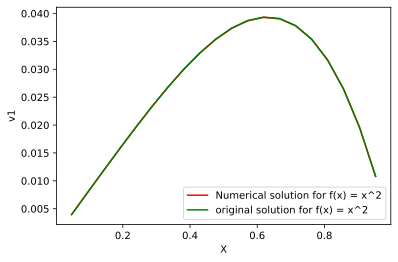

In [6]:
## original functions after analytically solving the equation
u1 = (1/12)*(x- x**4)
u2 = (np.e-1)*x - np.exp(x)+1
u3 = (1/4) * (np.cos(2*x)+((1-np.cos(2))*x)-1)    
u4 = l**2*(np.exp(1/l)-1)*x + (l**2) - ((l**2)*np.exp(x/l))
plt.xlabel('X')
plt.ylabel('v1')
plt.plot(x,v1,'r', label = 'Numerical solution for f(x) = x^2')
plt.plot(x,u1,'g', label = 'original solution for f(x) = x^2')
plt.legend()

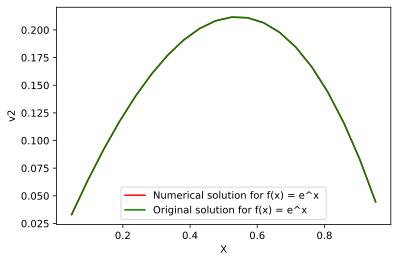

In [7]:
plt.xlabel('X')
plt.ylabel('v2')
plt.plot(x,v2,'r',label = 'Numerical solution for f(x) = e^x ')
plt.plot(x,u2,'g',label = 'Original solution for f(x) = e^x')
plt.legend()

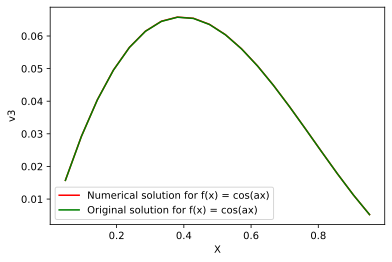

In [8]:
plt.xlabel('X')
plt.ylabel('v3')
plt.plot(x,v3,'r',label = 'Numerical solution for f(x) = cos(ax)')
plt.plot(x,u3,'g',label = 'Original solution for f(x) = cos(ax)')
plt.legend()

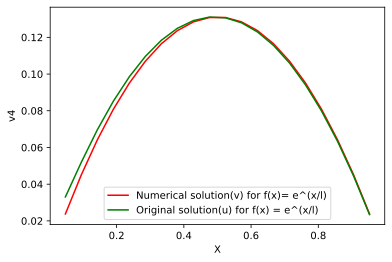

In [9]:
plt.xlabel('X')
plt.ylabel('v4')
plt.plot(x,v4,'r',label = 'Numerical solution(v) for f(x)= e^(x/l)')
plt.plot(x,u4,'g',label = 'Original solution(u) for f(x) = e^(x/l)')
plt.legend()

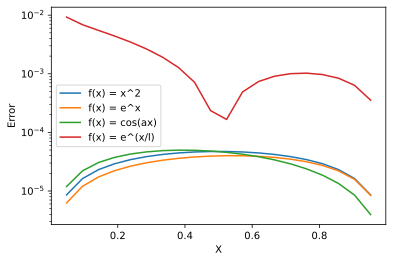

In [10]:
#plot for x vs error
plt.semilogy(x,np.abs(u1-v1),label = 'f(x) = x^2')
plt.semilogy(x,np.abs(u2-v2),label = 'f(x) = e^x')
plt.semilogy(x,np.abs(u3-v3),label = 'f(x) = cos(ax)')
plt.semilogy(x,np.abs(u4-v4),label = 'f(x) = e^(x/l)')
plt.xlabel('X')
plt.ylabel('Error')
plt.legend()

## Error Calculation
Error for a specific value of h can calculated by:
$$
E_{h} = max |u(x_{j}) - v_{j}|, \qquad 0 \le j \le n+1
$$

where $v_{j}$ is approximated value for u($x_{j}$).


After plotting $E_{h}$ vs $h$, we will observe that :-
$$
E_{h} \propto h.
$$

And $E_{h}$ satisfies a bound of the form:-
$$
E_{h} = O(h^{2}).
$$

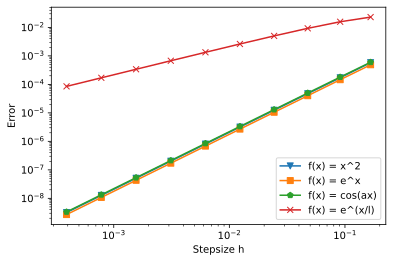

In [11]:
#for calculating error
m = 5
iterations = 10
max_error_1 = []
max_error_2 = []
max_error_3 = []
max_error_4 = []
step_size = []
for i in range(iterations):
    h = 1/(m+1)
    x = np.linspace(0+h,1-h,m)
    l = np.linspace(1,m,m)
    alpha = (1/h**2) * 2 * np.ones(m)
    beta = (1/h**2) * -1 * np.ones(m)
    gamma = (1/h**2) * -1 * np.ones(m)
    b1 = x**2
    b2 = np.exp(x)
    b3 = np.cos(2*x)
    b4 = np.exp(x/l)
    v1 = solve(m,alpha,beta,gamma,b1)
    v2 = solve(m,alpha,beta,gamma,b2)
    v3 = solve(m,alpha,beta,gamma,b3)
    v4 = solve(m,alpha,beta,gamma,b4)
    u1 = (1/12)*(x- x**4)
    u2 = (np.e-1)*x - np.exp(x)+1
    u3 = (1/4) * (np.cos(2*x)+((1-np.cos(2))*x)-1) 
    u4 = l**2*(np.exp(1/l)-1)*x + (l**2) - ((l**2)*np.exp(x/l))
    max_error_1.append(np.max(abs(u1-v1)))
    max_error_2.append(np.max(abs(u2-v2)))
    max_error_3.append(np.max(abs(u3-v3)))
    max_error_4.append(np.max(abs(u4-v4)))
    step_size.append(x[1]-x[0])
    m *= 2
plt.xlabel('Stepsize h')
plt.ylabel('Error')
plt.loglog(step_size,max_error_1,'-v',label = 'f(x) = x^2')
plt.loglog(step_size,max_error_2,'-s',label = 'f(x) = e^x')
plt.loglog(step_size,max_error_3,'-p',label = 'f(x) = cos(ax)')
plt.loglog(step_size,max_error_4,'-x',label = 'f(x) = e^(x/l)')
plt.legend()    

## Convergence Matrix
Finally, we will find the convergence matrix that shows how fast the approximated values are converging towards original function values with respect to n.
Rate of Convergence, $\alpha$, for both schemes can be calculated by:
$$
\alpha = \frac{log(e_{h_{1}}/e_{h_{2}})}{log({h_{1}/h_{2}})}
$$

where 
$e_{h_{1}}$ is error of scheme for stepsize $h_{1}.$

$h_{1}$ is stepsize for number of grid points $n_{1}$
$$
h_{1} = \frac{1}{n_{1} + 1}
$$

$e_{h_{2}}$ is error of scheme for stepsize $h_{2}.$

$h_{2}$ is stepsize for number of grid points $n_{2}$
$$
h_{2} = \frac{1}{n_{2} + 1}
$$

In [12]:
a = len(step_size)
conv1 = []
conv2 = []
conv3 = []
conv4 = []
for i in range(a-1):
    conv1.append((np.log(max_error_1[i]/max_error_1[i+1]))/(np.log(step_size[i]/step_size[i+1])))
    conv2.append((np.log(max_error_2[i]/max_error_2[i+1]))/(np.log(step_size[i]/step_size[i+1])))
    conv3.append((np.log(max_error_3[i]/max_error_3[i+1]))/(np.log(step_size[i]/step_size[i+1])))
    conv4.append((np.log(max_error_4[i]/max_error_4[i+1]))/(np.log(step_size[i]/step_size[i+1])))
print('Convergence rate for f(x) = x^2:',conv1)
print()
print('Covergence rate for f(x) = e^x:',conv2)
print()
print('Convergence rate for f(x) = cos(ax):',conv3)
print()
print('Convergence rate for f(x) = e^(x/l):',conv4)

Convergence rate for f(x) = x^2: [2.0136913258807985, 1.9906767692304586, 1.9974963179913587, 1.9993499067398421, 1.9998342712403863, 1.9999581477030126, 1.9999894819244657, 1.999996602799107, 1.9999826852554994]

Covergence rate for f(x) = e^x: [1.9871976141514116, 2.001343172492196, 1.99816117302805, 1.999855107522515, 1.9999760737413985, 1.9999956774631389, 1.9999962990807814, 1.999995049820176, 1.9998866362155636]

Convergence rate for f(x) = cos(ax): [1.9809592265664075, 1.9956452428687592, 1.9993293970759796, 2.0000743397241814, 2.0000449547086854, 1.9999804902190825, 1.9999969232550183, 2.0000014580145975, 2.0000363223478863]

Convergence rate for f(x) = e^(x/l): [0.6198763219093537, 0.8229288089576822, 0.914483707557931, 0.9579735613245488, 0.979167127143915, 0.9896283462627209, 0.9948253319569034, 0.9974154511500197, 0.9987084213063737]


**Therefore, we observe that slope of log(error) vs log(h) (i.e convergence rate) plot is almost similar for first 3 functions.
But it is less for $f(x) = e^{x/l}$.**

**Also, the semilog plot between $|v_{j} - u_{j}|$ and x for f(x) = $e^{x/l}$ reveals that error is large at the beginning of grid but decreases gradually till upto a certain grid point and then becomes stable after that point.**
